In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from patsy import dmatrices
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.model_selection import cross_val_score

In [2]:
data = sm.datasets.fair.load_pandas().data

In [3]:
data.keys()

Index(['rate_marriage', 'age', 'yrs_married', 'children', 'religious', 'educ',
       'occupation', 'occupation_husb', 'affairs'],
      dtype='object')

In [4]:
data.head()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs
0,3.0,32.0,9.0,3.0,3.0,17.0,2.0,5.0,0.111111
1,3.0,27.0,13.0,3.0,1.0,14.0,3.0,4.0,3.230769
2,4.0,22.0,2.5,0.0,1.0,16.0,3.0,5.0,1.400000
3,4.0,37.0,16.5,4.0,3.0,16.0,5.0,5.0,0.727273
4,5.0,27.0,9.0,1.0,1.0,14.0,3.0,4.0,4.666666


In [5]:
data['affair'] = (data.affairs>0).astype(int)

In [6]:
data.head()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs,affair
0,3.0,32.0,9.0,3.0,3.0,17.0,2.0,5.0,0.111111,1
1,3.0,27.0,13.0,3.0,1.0,14.0,3.0,4.0,3.230769,1
2,4.0,22.0,2.5,0.0,1.0,16.0,3.0,5.0,1.400000,1
3,4.0,37.0,16.5,4.0,3.0,16.0,5.0,5.0,0.727273,1
4,5.0,27.0,9.0,1.0,1.0,14.0,3.0,4.0,4.666666,1


In [7]:
data.describe()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs,affair
count,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000
mean,4.109645,29.082862,9.009425,1.396874,2.426170,14.209865,3.424128,3.850141,0.705374,0.322495
std,0.961430,6.847882,7.280120,1.433471,0.878369,2.178003,0.942399,1.346435,2.203374,0.467468
min,1.000000,17.500000,0.500000,0.000000,1.000000,9.000000,1.000000,1.000000,0.000000,0.000000
25%,4.000000,22.000000,2.500000,0.000000,2.000000,12.000000,3.000000,3.000000,0.000000,0.000000
50%,4.000000,27.000000,6.000000,1.000000,2.000000,14.000000,3.000000,4.000000,0.000000,0.000000
75%,5.000000,32.000000,16.500000,2.000000,3.000000,16.000000,4.000000,5.000000,0.484848,1.000000
max,5.000000,42.000000,23.000000,5.500000,4.000000,20.000000,6.000000,6.000000,57.599991,1.000000


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6366 entries, 0 to 6365
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   rate_marriage    6366 non-null   float64
 1   age              6366 non-null   float64
 2   yrs_married      6366 non-null   float64
 3   children         6366 non-null   float64
 4   religious        6366 non-null   float64
 5   educ             6366 non-null   float64
 6   occupation       6366 non-null   float64
 7   occupation_husb  6366 non-null   float64
 8   affairs          6366 non-null   float64
 9   affair           6366 non-null   int32  
dtypes: float64(9), int32(1)
memory usage: 472.6 KB


In [9]:
data.isnull().sum()

rate_marriage      0
age                0
yrs_married        0
children           0
religious          0
educ               0
occupation         0
occupation_husb    0
affairs            0
affair             0
dtype: int64

__EDA__

<AxesSubplot:>

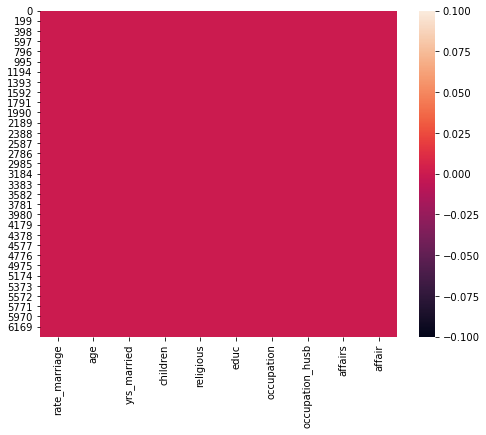

In [11]:
import seaborn as sns
fig, ax = plt.subplots(figsize=(8,6))
sns.heatmap(data.isnull(),ax=ax)

In [12]:
data['affair'].value_counts()

0    4313
1    2053
Name: affair, dtype: int64

<AxesSubplot:>

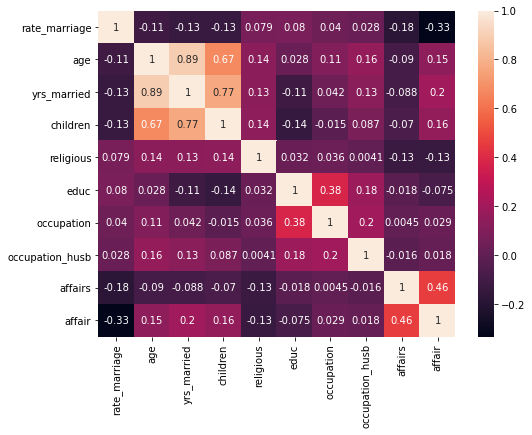

In [13]:
fig, ax = plt.subplots(figsize=(8,6))
sns.heatmap(data.corr(),annot=True)

<AxesSubplot:xlabel='affair', ylabel='yrs_married'>

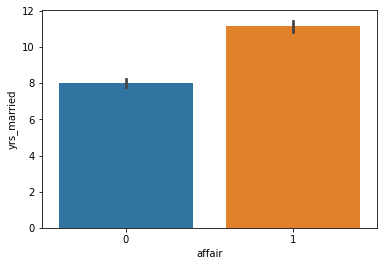

In [14]:
sns.barplot(x=data['affair'],y=data['yrs_married'])

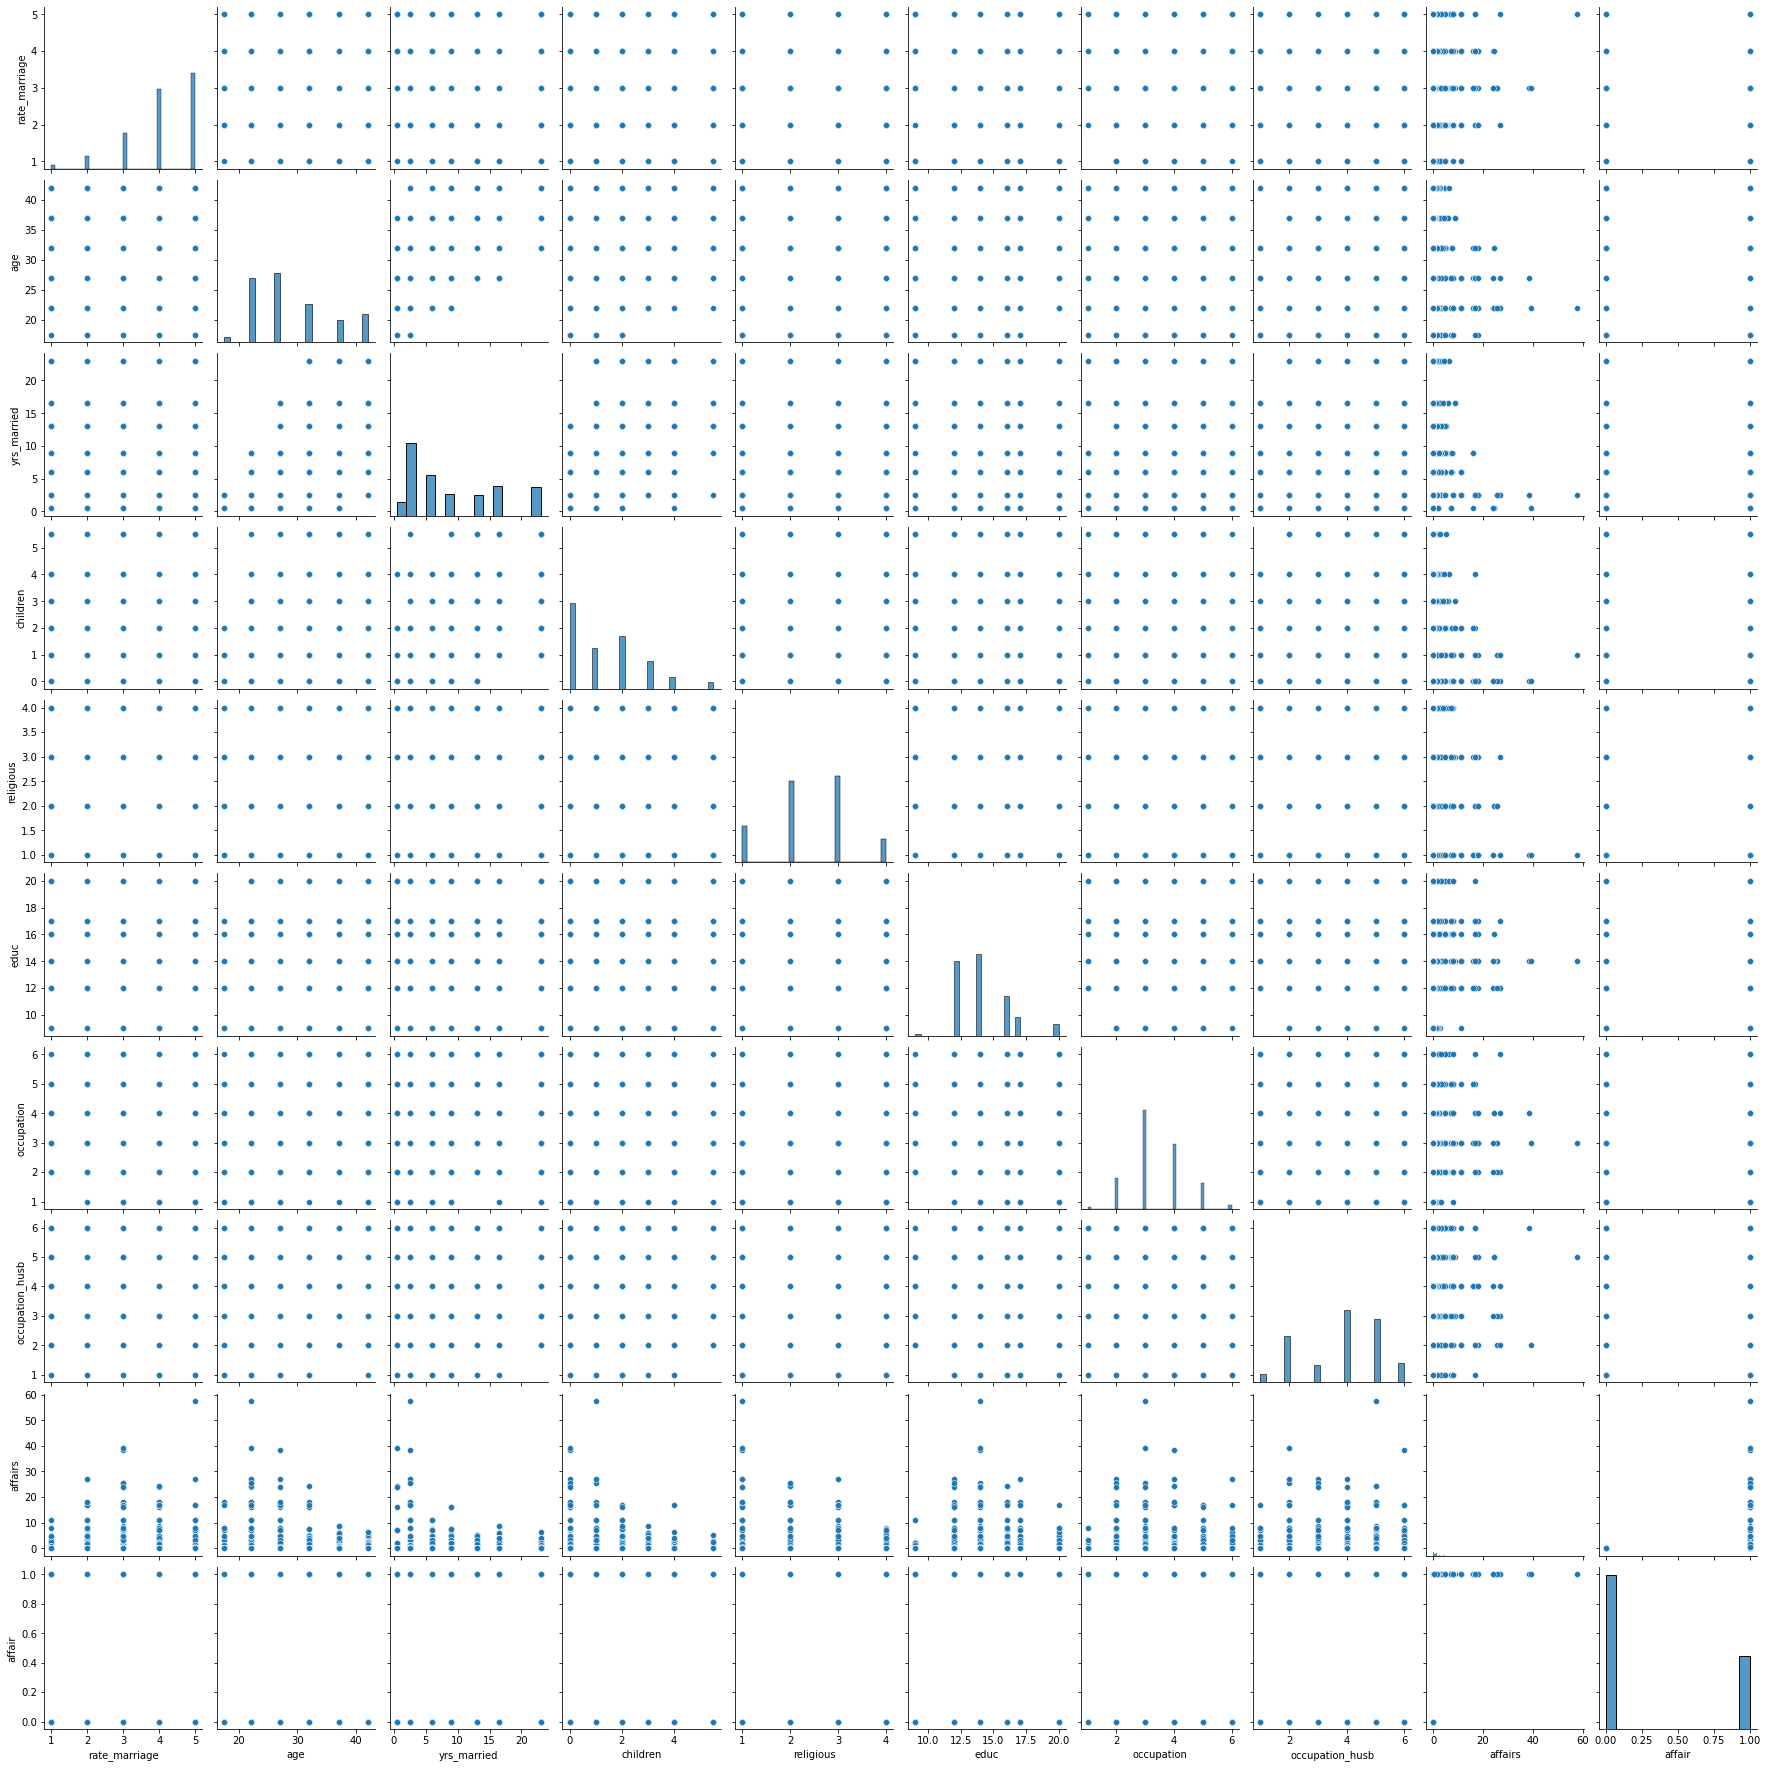

In [15]:
sns.pairplot(data)

Text(0, 0.5, 'Number of People')

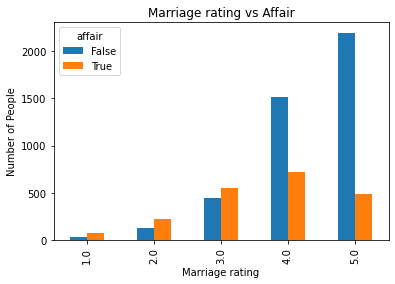

In [16]:
pd.crosstab(data['rate_marriage'],data['affair'].astype(bool)).plot(kind='bar')
plt.title("Marriage rating vs Affair")
plt.xlabel("Marriage rating")
plt.ylabel("Number of People")

Text(0, 0.5, 'Percentage')

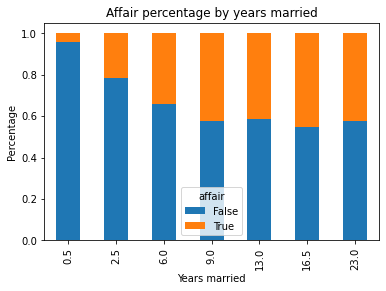

In [17]:
yrs_married_affair = pd.crosstab(data['yrs_married'],data['affair'].astype(bool))
yrs_married_affair.div(yrs_married_affair.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True)
plt.title('Affair percentage by years married')
plt.xlabel("Years married")
plt.ylabel("Percentage")

__Data Preprocessing__

In [18]:
y, X = dmatrices('affair ~ rate_marriage + age + yrs_married + children + religious + educ + C(occupation) + C(occupation_husb)', data, return_type="dataframe")

In [19]:
X

,Intercept,C(occupation)[T.2.0],C(occupation)[T.3.0],C(occupation)[T.4.0],C(occupation)[T.5.0],C(occupation)[T.6.0],C(occupation_husb)[T.2.0],C(occupation_husb)[T.3.0],C(occupation_husb)[T.4.0],C(occupation_husb)[T.5.0],C(occupation_husb)[T.6.0],rate_marriage,age,yrs_married,children,religious,educ
0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,3.0,32.0,9.0,3.0,3.0,17.0
1,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,3.0,27.0,13.0,3.0,1.0,14.0
2,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,4.0,22.0,2.5,0.0,1.0,16.0
3,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,4.0,37.0,16.5,4.0,3.0,16.0
4,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,5.0,27.0,9.0,1.0,1.0,14.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6361,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,5.0,32.0,13.0,2.0,3.0,17.0
6362,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,4.0,32.0,13.0,1.0,1.0,16.0
6363,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,22.0,2.5,0.0,2.0,14.0
6364,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,5.0,32.0,6.0,1.0,3.0,14.0


In [20]:
X = X.rename(columns =
{'C(occupation)[T.2.0]':'occ_2',

'C(occupation)[T.3.0]':'occ_3',
'C(occupation)[T.4.0]':'occ_4',
'C(occupation)[T.5.0]':'occ_5',
'C(occupation)[T.6.0]':'occ_6',
'C(occupation_husb)[T.2.0]':'occ_husb_2',
'C(occupation_husb)[T.3.0]':'occ_husb_3',
'C(occupation_husb)[T.4.0]':'occ_husb_4',
'C(occupation_husb)[T.5.0]':'occ_husb_5',
'C(occupation_husb)[T.6.0]':'occ_husb_6'})

In [21]:
X.head()

,Intercept,occ_2,occ_3,occ_4,occ_5,occ_6,occ_husb_2,occ_husb_3,occ_husb_4,occ_husb_5,occ_husb_6,rate_marriage,age,yrs_married,children,religious,educ
0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,3.0,32.0,9.0,3.0,3.0,17.0
1,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,3.0,27.0,13.0,3.0,1.0,14.0
2,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,4.0,22.0,2.5,0.0,1.0,16.0
3,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,4.0,37.0,16.5,4.0,3.0,16.0
4,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,5.0,27.0,9.0,1.0,1.0,14.0


In [22]:
y = np.ravel(y)

In [23]:
y

array([1., 1., 1., ..., 0., 0., 0.])

__Train Test split and Regression model__

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33,random_state=100)

In [25]:
log_regression = LogisticRegression()
log_regression.fit(X_train,y_train)

C:\Users\rkpla\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [26]:
log_regression

LogisticRegression()

In [27]:
log_regression.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [28]:
predicted = log_regression.predict(X_test)
predicted

array([0., 0., 0., ..., 0., 0., 0.])

In [29]:
probaility = log_regression.predict_proba(X_test)
probaility

array([[0.91867165, 0.08132835],
       [0.79986345, 0.20013655],
       [0.67784096, 0.32215904],
       ...,
       [0.67802985, 0.32197015],
       [0.82866987, 0.17133013],
       [0.89438894, 0.10561106]])

In [30]:
log_regression.score(X,y)

0.7230600062833804

__Performance metrics__

In [31]:
from sklearn.metrics import classification_report, roc_auc_score, accuracy_score, confusion_matrix

In [32]:
print("Classification: {}".format(classification_report(y_test,predicted)))

Classification:               precision    recall  f1-score   support

         0.0       0.73      0.90      0.81      1420
         1.0       0.61      0.32      0.42       681

    accuracy                           0.71      2101
   macro avg       0.67      0.61      0.61      2101
weighted avg       0.69      0.71      0.68      2101



In [33]:
print("Accuracy Score: {}".format(accuracy_score(y_test,predicted)))

Accuracy Score: 0.7134697762970015


In [34]:
print("ROC_AUC_score: {}".format(roc_auc_score(y_test,predicted)))

ROC_AUC_score: 0.6107329734648715


In [35]:
print("Confusion Matrix: {}".format(confusion_matrix(y_test,predicted)))

Confusion Matrix: [[1282  138]
 [ 464  217]]


In [36]:
cross_val_score(LogisticRegression(), X, y, scoring = 'accuracy',cv =10, n_jobs=-1).mean()

0.7236942527373794